<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Copy_of_Copy_of_telematics_syn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the dataset to Google Colab

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving telematics_syn.csv to telematics_syn.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Read the uploaded CSV file

In [ ]:
# Read the CSV file
df = pd.read_csv('telematics_syn.csv')

In [ ]:
categorical_cols = ['Insured.sex', 'Marital', 'Car.use', 'Region', 'Territory']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['NB_Claim', 'AMT_Claim'])  # Exclude target columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
X = df.drop(columns=['NB_Claim', 'AMT_Claim'])
X_preprocessed = pipeline.fit_transform(X)

In [10]:
y_nb_claim = df['NB_Claim']
y_amt_claim = df['AMT_Claim']

In [11]:
from sklearn.model_selection import train_test_split

# Assuming X_preprocessed is your preprocessed feature matrix and y_nb_claim and y_amt_claim are your target variables

# First, split the data into training and a temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_nb_train, y_nb_temp, y_amt_train, y_amt_temp = train_test_split(
    X_preprocessed, y_nb_claim, y_amt_claim, test_size=0.3, random_state=42
)

# Now, split the temporary set into validation and test sets
X_val, X_test, y_nb_val, y_nb_test, y_amt_val, y_amt_test = train_test_split(
    X_temp, y_nb_temp, y_amt_temp, test_size=0.5, random_state=42
)

# Print the sizes of the resulting sets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 70000 samples
Validation set: 15000 samples
Test set: 15000 samples


X_train shape: (70000, 111), y_nb_train shape: (70000,)
X_val shape: (15000, 111), y_nb_val shape: (15000,)
X_test shape: (15000, 111), y_nb_test shape: (15000,)
Epoch 1/100
2188/2188 [==============================] - 8s 3ms/step - loss: 0.1583 - accuracy: 0.9575 - val_loss: 0.1556 - val_accuracy: 0.9595
Epoch 2/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1468 - accuracy: 0.9580 - val_loss: 0.1458 - val_accuracy: 0.9597
Epoch 3/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1393 - accuracy: 0.9583 - val_loss: 0.1421 - val_accuracy: 0.9589
Epoch 4/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1281 - accuracy: 0.9591 - val_loss: 0.1391 - val_accuracy: 0.9588
Epoch 5/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1112 - accuracy: 0.9595 - val_loss: 0.1445 - val_accuracy: 0.9587
Epoch 6/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0536 - accuracy: 0.9592 - val_loss

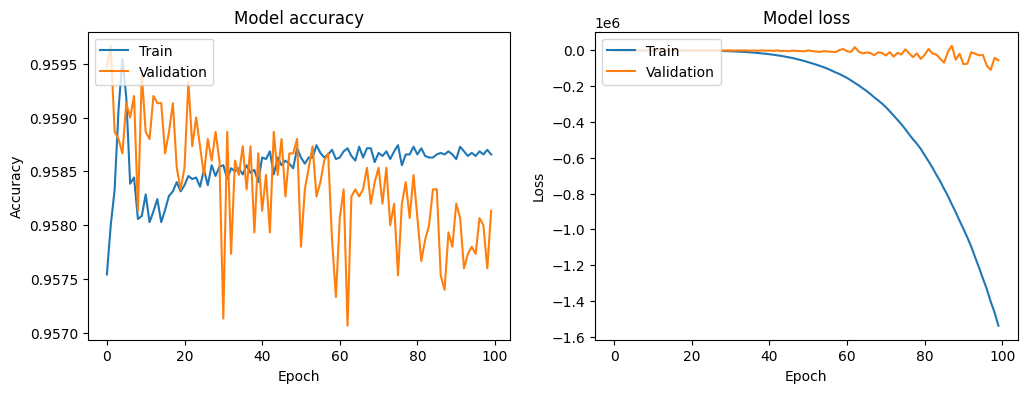

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the neural network model
def create_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification for 'NB_Claim'
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Check data shapes and types
print(f"X_train shape: {X_train.shape}, y_nb_train shape: {y_nb_train.shape}")
print(f"X_val shape: {X_val.shape}, y_nb_val shape: {y_nb_val.shape}")
print(f"X_test shape: {X_test.shape}, y_nb_test shape: {y_nb_test.shape}")

# Train the model
input_dim = X_train.shape[1]
model = create_model(input_dim)

history = model.fit(
    X_train, y_nb_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_nb_val),
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_nb_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [21]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier

# Ensure your data is in numpy array format
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_val_np = X_val.values if isinstance(X_val, pd.DataFrame) else X_val
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

y_nb_train_np = y_nb_train.values if isinstance(y_nb_train, pd.Series) else y_nb_train
y_nb_val_np = y_nb_val.values if isinstance(y_nb_val, pd.Series) else y_nb_val
y_nb_test_np = y_nb_test.values if isinstance(y_nb_test, pd.Series) else y_nb_test

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Train the model
tabnet_model.fit(
    X_train=X_train_np, y_train=y_nb_train_np,
    eval_set=[(X_val_np, y_nb_val_np)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model on the test set
test_preds = tabnet_model.predict(X_test_np)
test_accuracy = accuracy_score(y_nb_test_np, test_preds)

print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.2922  | val_0_accuracy: 0.9592  |  0:00:08s
epoch 1  | loss: 0.18019 | val_0_accuracy: 0.9592  |  0:00:14s
epoch 2  | loss: 0.17732 | val_0_accuracy: 0.95927 |  0:00:22s
epoch 3  | loss: 0.1742  | val_0_accuracy: 0.95927 |  0:00:29s
epoch 4  | loss: 0.17214 | val_0_accuracy: 0.95927 |  0:00:36s
epoch 5  | loss: 0.17184 | val_0_accuracy: 0.95927 |  0:00:43s
epoch 6  | loss: 0.17048 | val_0_accuracy: 0.95927 |  0:00:51s
epoch 7  | loss: 0.16877 | val_0_accuracy: 0.95927 |  0:00:57s
epoch 8  | loss: 0.16789 | val_0_accuracy: 0.95927 |  0:01:05s
epoch 9  | loss: 0.16703 | val_0_accuracy: 0.95927 |  0:01:12s
epoch 10 | loss: 0.16603 | val_0_accuracy: 0.95927 |  0:01:19s
epoch 11 | loss: 0.16462 | val_0_accuracy: 0.95927 |  0:01:26s
epoch 12 | loss: 0.16393 | val_0_accuracy: 0.95927 |  0:01:33s

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_accuracy = 0.95927


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9543
